# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, we gather **all** three pieces of data for this project and load them in the notebook. 
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests 
import os
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import csv file
twitter_rating = pd.read_csv('twitter-archive-enhanced.csv')

2. Using the Requests library, the tweet image prediction (image_predictions.tsv) is downloaded

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#read the json file
retweets = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        retweets.append(tweets)
retweet = pd.DataFrame(retweets, columns=['id', 'retweet_count', 'favorite_count'])

## Assessing Data
In this section, we detect and document **eight (8) quality issues and two (2) tidiness issue** using both visual and
programmatic assessement to assess the data.


* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.


In [5]:
twitter_rating.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
twitter_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
retweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [10]:
retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues

1. The retweeted rows that have data for retweets and are not needed as only the original ratings are needed


2. Timestamp column is in string format and not datetime format


3. The inreply columns are also not needed for this analysis


4. Some of the dog names are 'none'


5. Upper and lower case inconsistencies in the p1,p2 and p3 columns


6. For the source column it should contain a description of the source and not urls


7. The id column in the retweet dataframes should have the same title as the other dataframes for ease when merging


8. The names in p1,p2,p3 columns of the image_prediction data have underscore instead of space


### Tidiness issues

9. The dog stages doggo, floofer, pupper, and puppo should be in a single column as opposed to four columns as a particular dog    can only be in one stage per time. 


10. The data(twitter_rating, image_predictions & retweet) should be merged into one dataset

## Cleaning Data

In this section, we clean **all** of the issues documented while assessing. 

Copies of the original pieces of data are made 

After cleaning, we would then merge  into a high-quality and tidy master pandas DataFrame.

In [11]:
df_twitter_rating = twitter_rating.copy()

In [12]:
df_image_predictions = image_predictions.copy()

In [13]:
df_retweet = retweet.copy()

### Issue #1

#### Define: 

The rows that contain data for retweets are to be dropped as we only need the original tweets.

Delete rows where the retweeted status is not null


#### Code

In [14]:
#drop retweeted rows
df_twitter_rating = df_twitter_rating[df_twitter_rating.retweeted_status_id.isna()]

#### Test

In [15]:
#confirm drop
df_twitter_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2

#### Define

The timestamp column in the twitter_rating dataset is in string format.    
The timestamp column should be changed to time format.

#### Code

In [16]:
#change 'datetime' type
df_twitter_rating['timestamp'] = pd.to_datetime(df_twitter_rating.timestamp)

#### Test

In [17]:
#confirm type change
df_twitter_rating.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

### Issue #3

#### Define: 

The retweet and in_reply columns('retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_user_id', 'retweeted_status_id', in_reply_to_status_id') were dropped as the columns are not needed

#### Code

In [18]:
df_twitter_rating.drop(['retweeted_status_user_id','retweeted_status_timestamp', 'retweeted_status_id',
                        'in_reply_to_user_id','in_reply_to_status_id'], axis = 1, inplace = True)

#### Test

In [19]:
df_twitter_rating.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Issue #4

#### Define: 

There are missing dog names but rather than showing as null values they are showing as 'None'. This should be replaced with numpy null values

#### Code

In [20]:
#replace 'none' values with np.nan
df_twitter_rating.name = df_twitter_rating.name.replace(['None'] ,np.nan)

#### Test

In [21]:
#confrim replacement
df_twitter_rating.name.value_counts(20)

a          0.036789
Charlie    0.007358
Lucy       0.007358
Cooper     0.006689
Oliver     0.006689
             ...   
Tuck       0.000669
Newt       0.000669
Joshwa     0.000669
Fabio      0.000669
Tedders    0.000669
Name: name, Length: 955, dtype: float64

### Issue #5

#### Define: 

The p1,p2 and p3 columns start with both lower and upper case characters. 
This inconsistency would be resolved by chainging the fisrt letters to uppercase.

#### Code

In [22]:
# make the names uniform by capitalizing them

df_image_predictions.p1 = df_image_predictions.p1.str.capitalize()
df_image_predictions.p2 = df_image_predictions.p2.str.capitalize()
df_image_predictions.p3 = df_image_predictions.p3.str.capitalize()

#### Test

In [23]:
#Confirm that the names have been capitalized
df_image_predictions.p1.head()

0    Welsh_springer_spaniel
1                   Redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        Miniature_pinscher
Name: p1, dtype: object

In [24]:
df_image_predictions.p2.head()

0                Collie
1    Miniature_pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

In [25]:
df_image_predictions.p3.head()

0      Shetland_sheepdog
1    Rhodesian_ridgeback
2             Bloodhound
3     Miniature_pinscher
4               Doberman
Name: p3, dtype: object

### Issue #6

#### Define: 

The source column should be replaced with text.

#### Code

In [26]:
#assess the source column
df_twitter_rating.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [27]:
#extract the string
   
df_twitter_rating.loc[df_twitter_rating.source.str.contains('Twitter for iPhone'),'source'] = 'Twitter for iPhone'
df_twitter_rating.loc[df_twitter_rating.source.str.contains('Vine - Make a Scene'),'source'] = 'Vine - Make a Scene'
df_twitter_rating.loc[df_twitter_rating.source.str.contains('Twitter Web Client'),'source'] = 'Twitter Web Client'
df_twitter_rating.loc[df_twitter_rating.source.str.contains('TweetDeck'),'source'] = 'TweetDeck'

#### Test

In [28]:
df_twitter_rating.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Issue #7

#### Define: 

Rename the id column to tweet_id

#### Code


In [29]:
df_retweet.rename(columns = {'id' : 'tweet_id'}, inplace = True)

#### Test

In [30]:
df_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Issue #8

#### Define: 

For the p1,p2 and p3 columns, the names have an underscore instead of a space.
The underscore would be replaced with a space.

#### Code

In [31]:
#using replace, '_' is switched with ' '

df_image_predictions.p1 = df_image_predictions.p1.str.replace('_',' ')
df_image_predictions.p2 = df_image_predictions.p2.str.replace('_',' ')
df_image_predictions.p3 = df_image_predictions.p3.str.replace('_',' ')

#### Test

In [32]:
#confirm replacement
df_image_predictions.p1.head()

0    Welsh springer spaniel
1                   Redbone
2           German shepherd
3       Rhodesian ridgeback
4        Miniature pinscher
Name: p1, dtype: object

In [33]:
df_image_predictions.p2.head()

0                Collie
1    Miniature pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

In [34]:
df_image_predictions.p3.head()

0      Shetland sheepdog
1    Rhodesian ridgeback
2             Bloodhound
3     Miniature pinscher
4               Doberman
Name: p3, dtype: object

### Issue #9

#### Define: 

Each dog should have only one stage so the four columns would be melted together to create a single column.

#### Code

In [35]:
#replace 'none' with np.nan
df_twitter_rating.doggo = df_twitter_rating.doggo.replace(['None'] ,np.nan)
df_twitter_rating.floofer = df_twitter_rating.floofer.replace(['None'] ,np.nan)
df_twitter_rating.pupper = df_twitter_rating.pupper.replace(['None'] ,np.nan)
df_twitter_rating.puppo = df_twitter_rating.puppo.replace(['None'] ,np.nan)

In [36]:
#test code
df_twitter_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1495 non-null   object             
 8   doggo               87 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              234 non-null    object             
 11  puppo               25 non-null     object             
dtypes: datetime64[ns, UTC](1), int64(3

In [37]:
#merge the 4 dog stage rows into 1
df_twitter_rating= pd.melt(df_twitter_rating, var_name = ['dog_stages'], 
                           id_vars = ['tweet_id','timestamp','source','text', 'expanded_urls', 
                                      'rating_numerator','rating_denominator','name'], 
                           value_vars= ['doggo','floofer','pupper','puppo'])

In [38]:
#confirm merger
df_twitter_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8700 non-null   int64              
 1   timestamp           8700 non-null   datetime64[ns, UTC]
 2   source              8700 non-null   object             
 3   text                8700 non-null   object             
 4   expanded_urls       8468 non-null   object             
 5   rating_numerator    8700 non-null   int64              
 6   rating_denominator  8700 non-null   int64              
 7   name                5980 non-null   object             
 8   dog_stages          8700 non-null   object             
 9   value               356 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 679.8+ KB


In [39]:
#using value_counts confirm the content of the melted row
df_twitter_rating.value.value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: value, dtype: int64

In [40]:
#the rows that were melted are dropped 
df_twitter_rating = df_twitter_rating.drop('dog_stages', axis = 1)

In [41]:
df_twitter_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8700 non-null   int64              
 1   timestamp           8700 non-null   datetime64[ns, UTC]
 2   source              8700 non-null   object             
 3   text                8700 non-null   object             
 4   expanded_urls       8468 non-null   object             
 5   rating_numerator    8700 non-null   int64              
 6   rating_denominator  8700 non-null   int64              
 7   name                5980 non-null   object             
 8   value               356 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 611.8+ KB


In [42]:
#drop duplicates which occured after merging
df_twitter_rating = df_twitter_rating.sort_values('value').drop_duplicates(subset='tweet_id')

#### Test

In [43]:
df_twitter_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 9 to 2174
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1495 non-null   object             
 8   value               344 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 169.9+ KB


### Issue #10


#### Define: 

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [44]:
#merge df_twitter_rating and df_image_predictions
df_dog = pd.merge(df_twitter_rating, df_image_predictions, on = 'tweet_id', how = 'left')

#### Test

In [45]:
#confirm merger
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1495 non-null   object             
 8   value               344 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   float64            
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

In [46]:
#merge df_dog & df_retweet
twitter_archive_master = pd.merge(df_dog, df_retweet, on = 'tweet_id', how = 'left')

In [47]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                1495 non-null   object             
 8   value               344 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   float64            
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

## Storing Data

The gathered, assessed, and cleaned master dataset is saved to a CSV file named "twitter_archive_master.csv".

In [48]:
#save merged dataset to csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

In [49]:
#confirm and read csv file
df = pd.read_csv('twitter_archive_master.csv')

In [50]:
#assess the top 5 rows
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,value,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
1,756526248105566208,2016-07-22 16:28:07+00:00,Twitter for iPhone,All hail sky doggo. 13/10 would jump super hig...,https://twitter.com/dog_rates/status/756526248...,13,10,NaN,doggo,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,...,0.991273,False,Volcano,0.004673,False,Fountain,0.001234,False,4169,11506
2,757393109802180609,2016-07-25 01:52:43+00:00,Twitter for iPhone,Here's a doggo completely oblivious to the dou...,https://twitter.com/dog_rates/status/757393109...,10,10,NaN,doggo,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,...,0.787125,True,Chesapeake bay retriever,0.112676,True,Rottweiler,0.048039,True,2009,6462
3,758828659922702336,2016-07-29 00:57:05+00:00,Twitter for iPhone,This doggo is just waiting for someone to be p...,https://twitter.com/dog_rates/status/758828659...,13,10,NaN,doggo,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,...,0.480048,True,Vizsla,0.264522,True,Weimaraner,0.121840,True,4376,12376
4,759793422261743616,2016-07-31 16:50:42+00:00,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,...,0.985876,True,Labrador retriever,0.001948,True,Kuvasz,0.001752,True,2173,6620


In [51]:
#assess the bottom 5 rows
df.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,value,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
2170,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
2171,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,147,311
2172,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,47,128
2173,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,48,132
2174,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,532,2535


## Analyzing and Visualizing Data
In this section, we analyze and visualize the wrangled data.

After gathering data concerning the tweets of Twitter user @dog_rates also known as WeRateDogs from three sources, we have cleaned the data and stored the data gotten and would go ahead to analyse

### Visualization

In [52]:
# a copy of the archived master table is made
df_copy = df.copy()

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                1495 non-null   object 
 8   value               344 non-null    object 
 9   jpg_url             1994 non-null   object 
 10  img_num             1994 non-null   float64
 11  p1                  1994 non-null   object 
 12  p1_conf             1994 non-null   float64
 13  p1_dog              1994 non-null   object 
 14  p2                  1994 non-null   object 
 15  p2_conf             1994 non-null   float64
 16  p2_dog

### 1. Majority of the source for the the data was gotten from Twiiter for iPhone


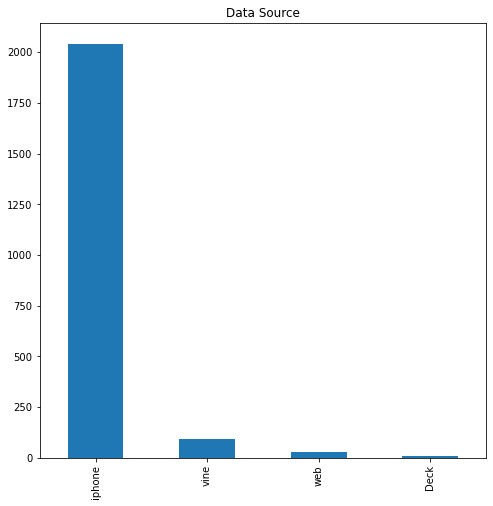

In [54]:
# Illustrates the data source

labels = ('iphone', 'vine', 'web','Deck')
plt.title("Data Source")
df_copy.source.value_counts().plot(kind= 'bar', figsize = (8,8));
plt.xticks(np.arange(4), labels);

### 2. Users seem to like puppers more as their favorite count is the highest


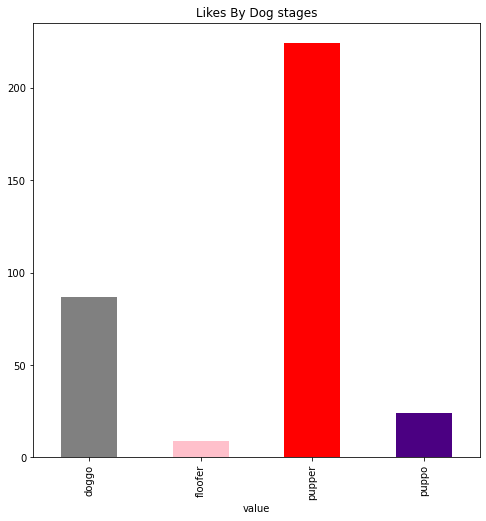

In [55]:
#dog stage with the highest likes
labels = ( 'doggo', 'floofer', 'pupper', 'puppo')
plt.title("Likes By Dog stages")
df_copy.groupby('value')['favorite_count'].count().plot(kind= 'bar', 
                                                        color = ['grey', 'pink', 'red', 'indigo'], figsize = (8,8));
plt.xticks(np.arange(4), labels);

### 3. The pupper is also the most popular dog stage. This could explain why it has the most likes.                               It is also possible that it isn't the most popular but the data gotten has more puppers than any other dog. stage

In [56]:
#Most popular dog stage
df_copy.value.value_counts()

pupper     224
doggo       87
puppo       24
floofer      9
Name: value, dtype: int64